In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm

from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier

import math

np.set_printoptions(suppress=True)
%config InlineBackend.figure_format = 'retina'

In [2]:
df = pd.read_excel('CarPrice.xlsx')

In [3]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


## Computing summary statistics: What is the mean miles per gallon on the highway in these data?  What is the standard deviation?  Which car(s) get the lowest miles per gallon on the highway? Which vehicle has the largest highway mpg?

In [4]:
# Mean: 30.751220 , SD: 6.886443
df['highwaympg'].describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

In [5]:
df.sort_values(by=['highwaympg'], ascending=True)[['CarName','highwaympg']].head(3)

,CarName,highwaympg
74,buick regal sport coupe (turbo),16
73,buick century special,16
49,jaguar xk,17


In [6]:
df.sort_values(by=['highwaympg'], ascending=False)[['CarName','highwaympg']].head(3)

,CarName,highwaympg
30,honda civic,54
18,chevrolet impala,53
90,nissan gt-r,50


### Answers

- Mean: 30.751220

- Standard Deviation: 6.886443

- Lowest highway mpg: buick regal sport coupe (turbo), buick century special - 16

- Highest highway mpg: honda civic - 54

##	Linear prediction line: Estimate the best linear prediction line with price as the response variable and highway mpg as the explanatory variable. Display the regression output. 

a.	Interpret the both the slope and the intercept. Be sure to use the correct units.

b.	Create a scatterplot of price on highway mpg with your estimated prediction line. This is what EXCEL calls the “Line Fit Plot”. Please label the units on both axes. How is the fit of this regression model? Does the model tend to underpredict or overpredict the price of vehicles with respect to mpg?

c.	Create a scatterplot of the residuals on highway mpg. This is what EXCEL calls the “Residual Plot”. Please label the units on both axes. Do we notice any similarities between the residual plot and line-fit plot? What does a positive residual represent? 


In [7]:
y = df['price']
X = df['highwaympg']

X = sm.add_constant(X)
model = sm.OLS(y, X)
results = model.fit()

print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.487
Model:                            OLS   Adj. R-squared:                  0.484
Method:                 Least Squares   F-statistic:                     192.4
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           3.23e-31
Time:                        12:22:43   Log-Likelihood:                -2064.1
No. Observations:                 205   AIC:                             4132.
Df Residuals:                     203   BIC:                             4139.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3.816e+04   1838.179     20.761      0.0

In [8]:
df['residuals_1'] = results.resid

### Slope: Increase in 1 highwaympg decreases price by $809.2735 

### Intercept: A car with 0 highwaympg costs $38160 (not interpretable)

<Axes: xlabel='highwaympg', ylabel='price'>

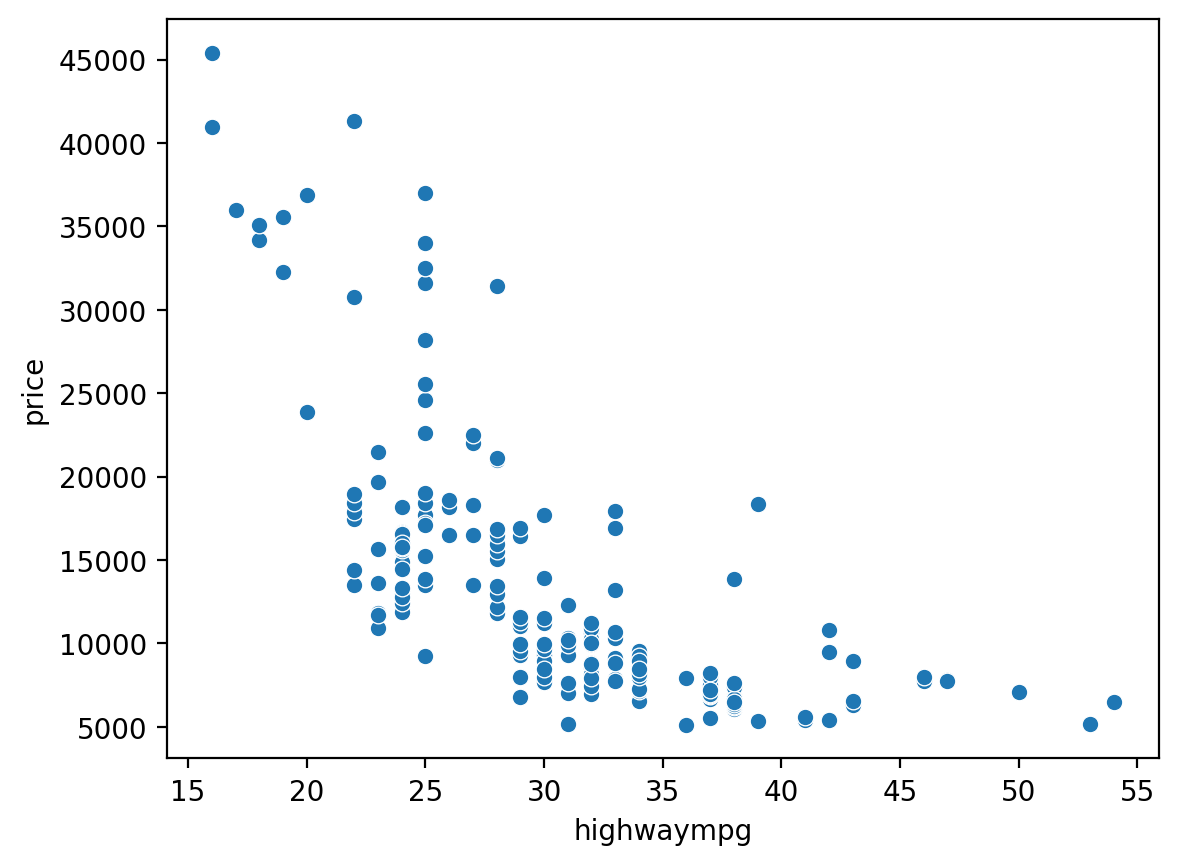

In [9]:
sns.scatterplot(data=df, x="highwaympg", y="price")

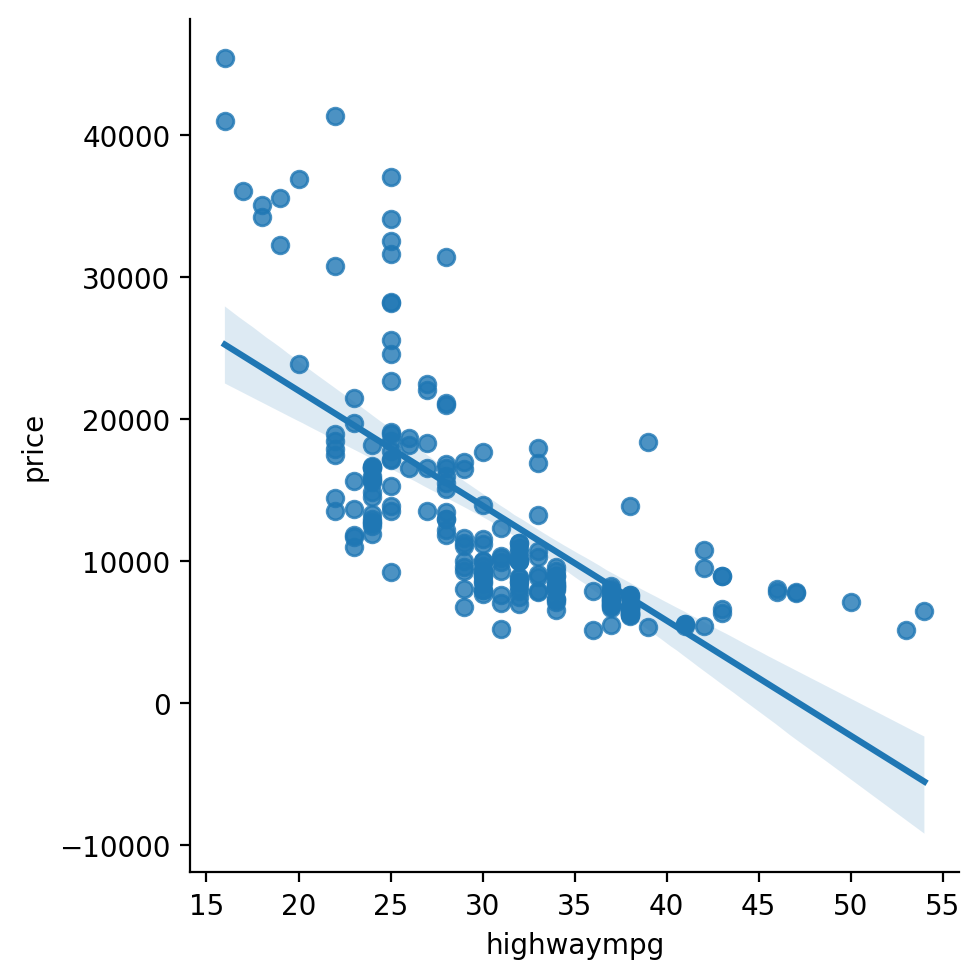

In [10]:
sns.lmplot(data=df, x="highwaympg", y="price")

### Model overpredicts 22-40 range, and underpredicts < 22 and > 40

### Residuals

**$r = y - \hat{y}$**

**Underpredict: $if r \gt 0 => y > \hat{y}$**

**Overpredict: $if r \lt 0 => y < \hat{y}$**

**+ve residual: underpredict, -ve residual: overpredict**

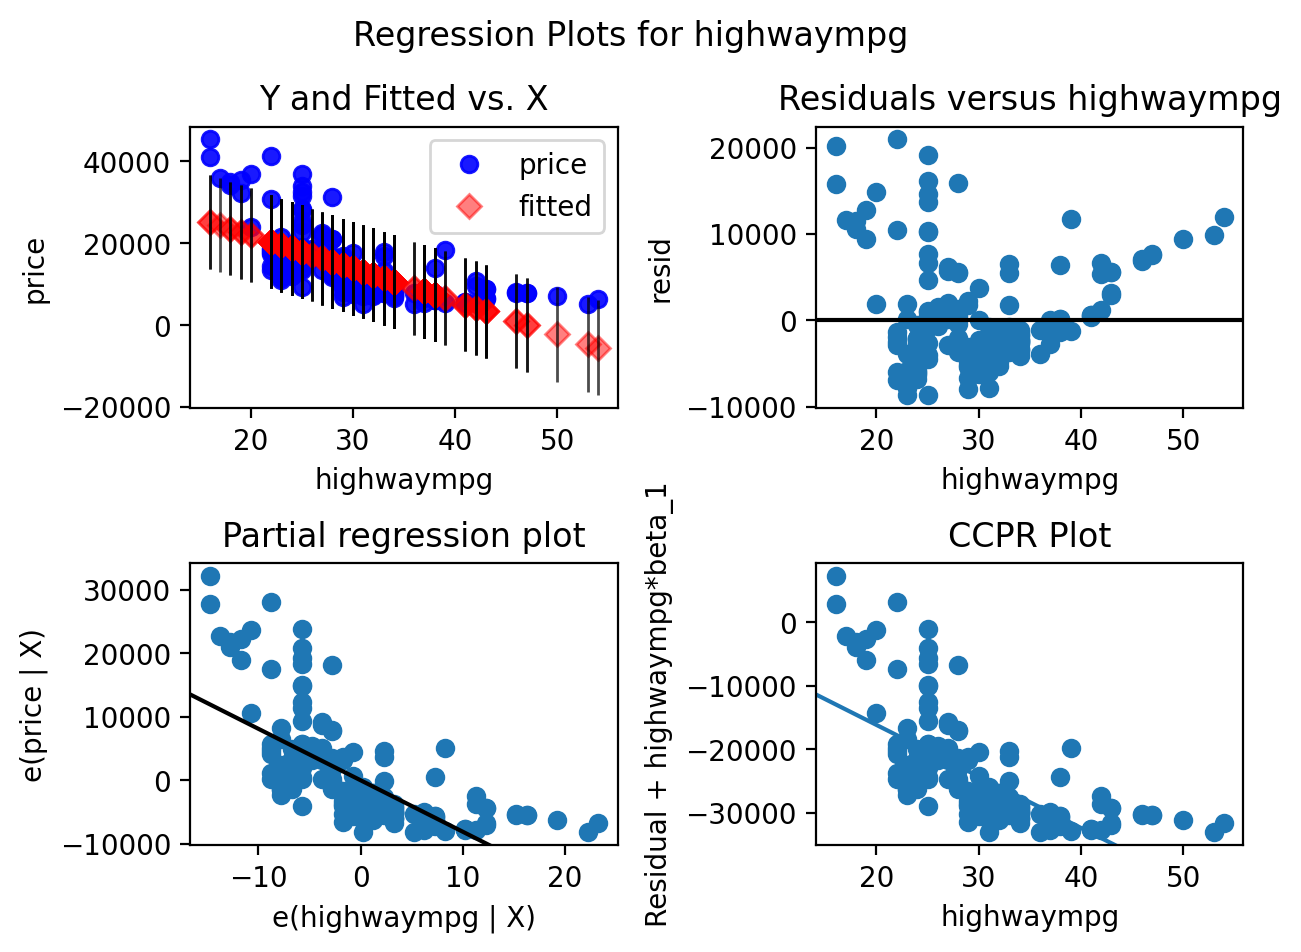

In [11]:
# Regression residual plots
fig = sm.graphics.plot_regress_exog(results, "highwaympg")
fig.tight_layout(pad=1.0)

# Curved prediction line: Now estimate a regression with the natural log of price as the response variable and highway mpg as the explanatory variable.  You will need to create the new response variable yourself. Display the output table.

How do you interpret the slope coefficient? 

Create a residual plot. How does it compare to the previous residual plot. Explain briefly.

The prediction line we have estimated can be written as follows: ln⁡(price)=b_0+b_1 highway_mpg. We can transform this equation by taking the exponential function of both sides: price=exp⁡(b_0+b_1 highway_mpg). Compute this transform prediction and add to the scatterplot of price and highway mpg. What do we notice?


In [12]:
df['price_log'] = np.log(df['price'])

In [13]:
y = df['price_log']
X = df['highwaympg']

X = sm.add_constant(X)
model1 = sm.OLS(y, X)
results1 = model1.fit()

print(results1.summary())

                            OLS Regression Results                            
Dep. Variable:              price_log   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.599
Method:                 Least Squares   F-statistic:                     305.7
Date:                Sun, 26 Nov 2023   Prob (F-statistic):           2.31e-42
Time:                        12:22:44   Log-Likelihood:                -55.682
No. Observations:                 205   AIC:                             115.4
Df Residuals:                     203   BIC:                             122.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         11.0987      0.102    108.590      0.0

In [14]:
df['residuals_2'] = results1.resid

<Axes: xlabel='highwaympg', ylabel='price_log'>

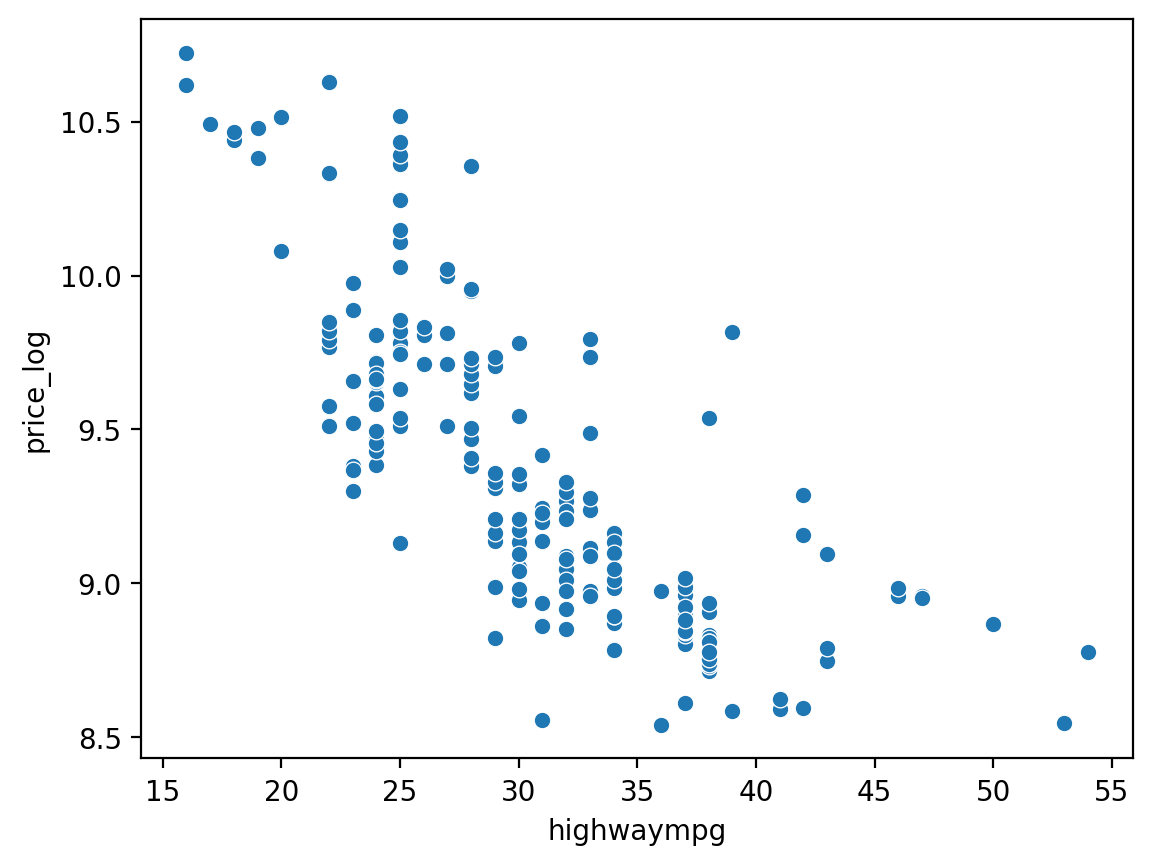

In [15]:
sns.scatterplot(data=df, x="highwaympg", y="price_log")

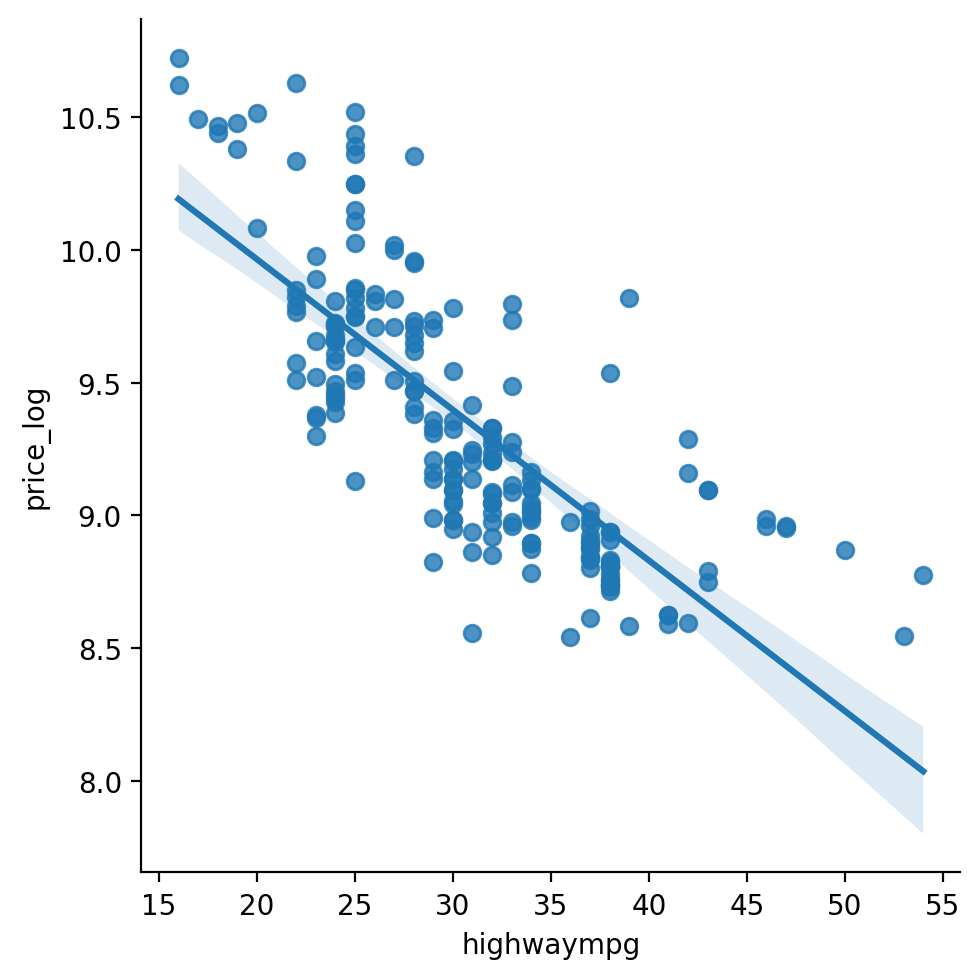

In [16]:
sns.lmplot(data=df, x="highwaympg", y="price_log")

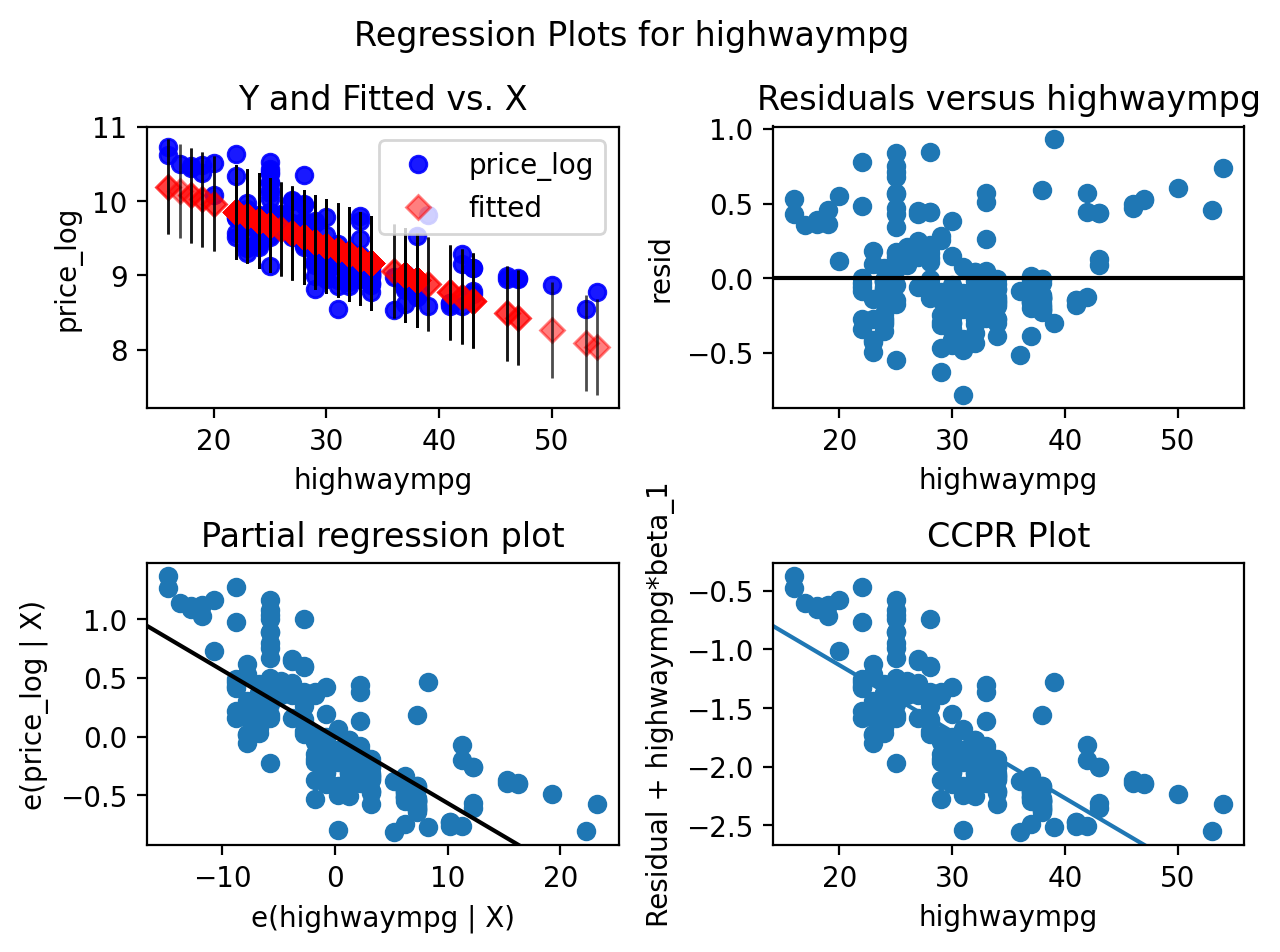

In [17]:
fig = sm.graphics.plot_regress_exog(results1, "highwaympg")
fig.tight_layout(pad=1.0)

### Compare residuals

**Residual plots look similar, only scales are different**

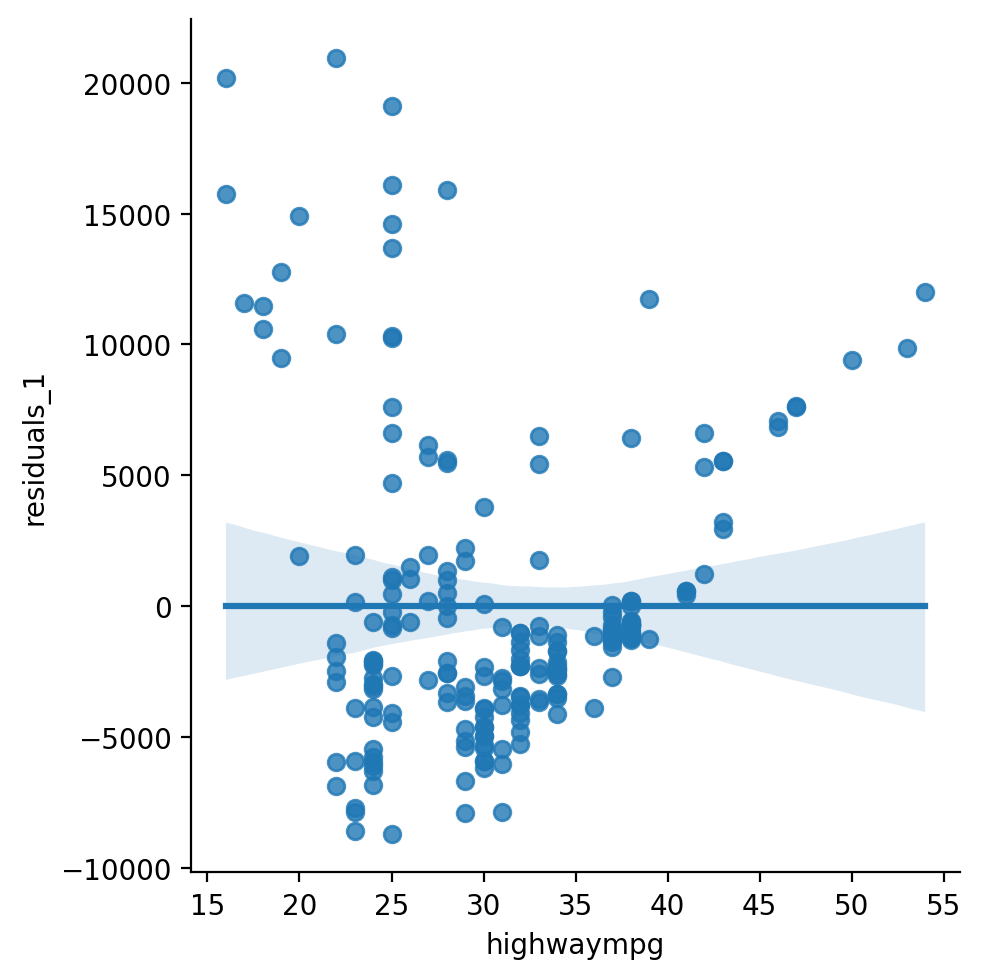

In [18]:
sns.lmplot(data=df, x="highwaympg", y="residuals_1")

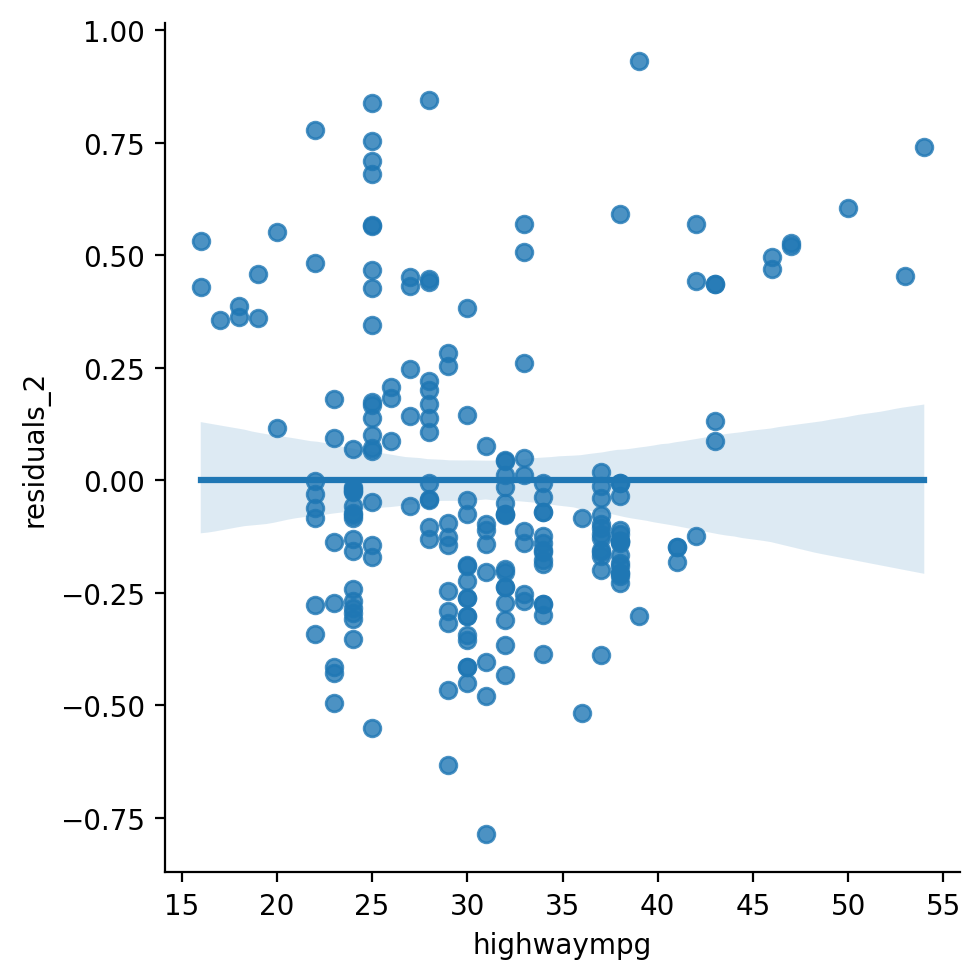

In [19]:
sns.lmplot(data=df, x="highwaympg", y="residuals_2")

<Axes: xlabel='highwaympg', ylabel='residuals_2'>

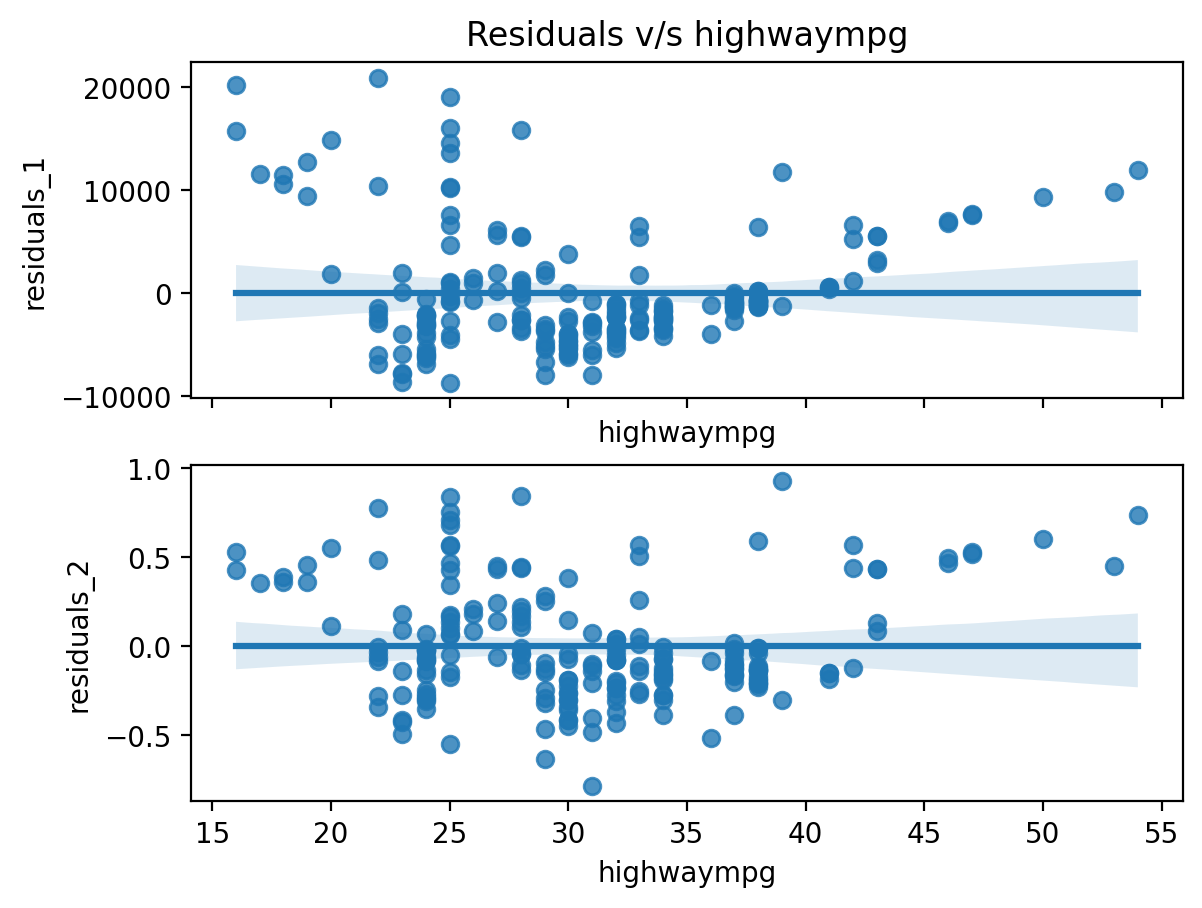

In [63]:
# Create two subplots (share same x axis)
f, (ax1, ax2) = plt.subplots(2, 1, sharex=True)
sns.regplot(data=df, x="highwaympg", y="residuals_1", ax=ax1)
ax1.set_title('Residuals v/s highwaympg')
sns.regplot(data=df, x="highwaympg", y="residuals_2", ax=ax2)

In [47]:
# Underestimate
print(df[df.residuals_1 > 0].shape, df[df.residuals_2 > 0].shape)
# Exact fit
print(df[df.residuals_1 == 0].shape, df[df.residuals_2 == 0].shape)
# Overestimate
print(df[df.residuals_1 < 0].shape, df[df.residuals_2 < 0].shape)

(67, 29) (73, 29)
(0, 29) (0, 29)
(138, 29) (132, 29)


### Conclusion on Residuals between 2 models

Hard to conclude anything from the residual plots. From the data above:

|Model |Underestimate Count|Overestimate Count|Perfect Fit|
|:-----|:----:|----:|----:|
|price~highwaympg |67 |138 |0 |
|log(price)~highwaympg |73 |132 |0 |

In [50]:
df['price_transformed'] = np.exp(11.0987 + -0.0567 * df['highwaympg'])
df[['price', 'price_transformed']].head(5)

,price,price_transformed
0,13495.0,14296.928458
1,16500.0,14296.928458
2,16500.0,15130.986406
3,13950.0,12060.609404
4,17450.0,18983.016690


In [56]:
df[['price', 'price_transformed']].describe()

,price,price_transformed
count,205.000000,205.000000
mean,13276.710571,12407.487152
std,7988.852332,4536.921989
min,5118.000000,3093.009982
25%,7788.000000,9613.272743
50%,10295.000000,12060.609404
75%,16503.000000,16013.701844
max,45400.000000,26675.478122


Text(0, 0.5, 'price')

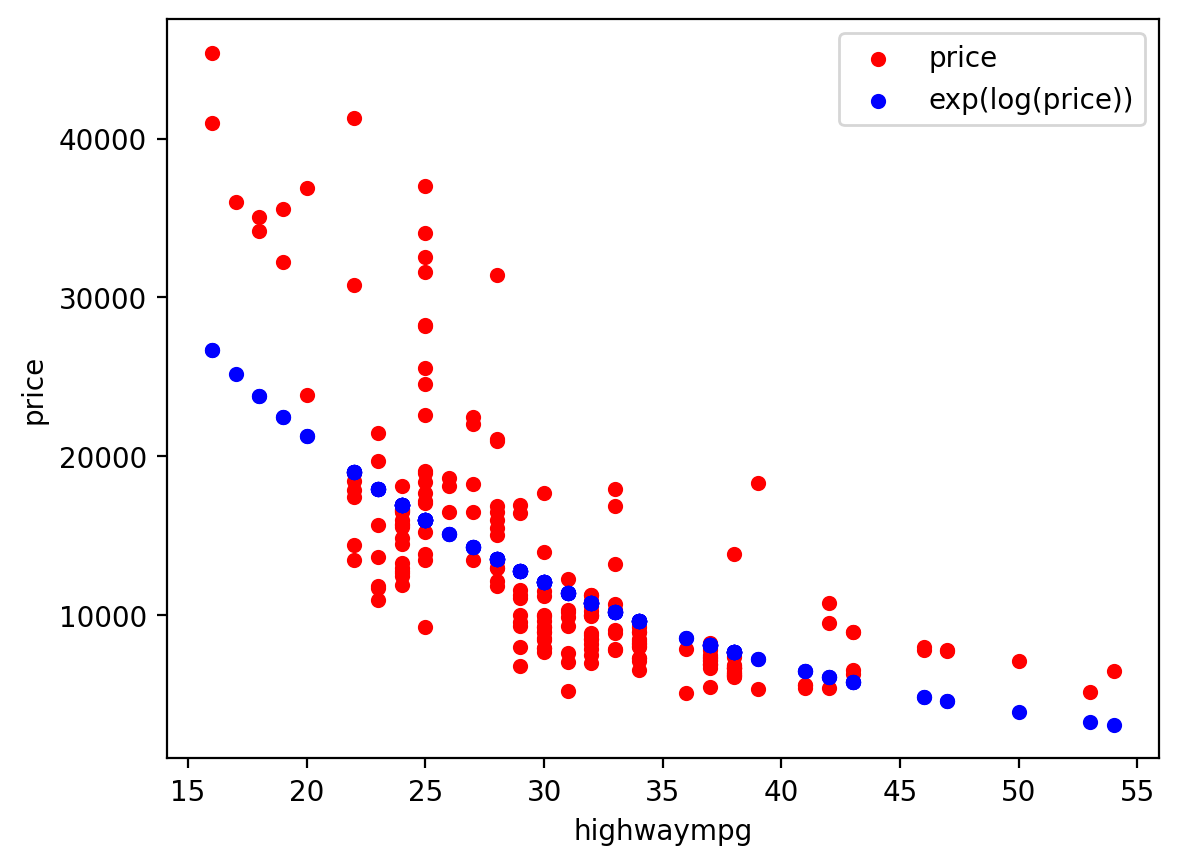

In [61]:
#create scatter plot of A_assists vs. A_points
ax1=df.plot(kind='scatter', x='highwaympg', y='price', color='r', label='price')

#add scatter plot on same graph using B_assists vs. B_points
ax2=df.plot(kind='scatter', x='highwaympg', y='price_transformed', color='b', label='exp(log(price))', ax=ax1)

#specify x-axis and y-axis labels
ax1.set_xlabel('highwaympg')
ax1.set_ylabel('price')

### The 2nd model log(price)~highwaympg fits a curve, where highwaympg is the independent variable and price is the response variable, which looks to be a better fit to the data that is clearly not linear